# How to open Data Files

***

## Imports

- *numpy* to handle array operations
- *asdf* to handle ASDF input/output
- *roman_datamodels* to handle input/output and validation of data models
- *astropy.io fits* for accessing FITS files
- *astropy.table Table* for creating tidy tables of the data
- *matplotlib.pyplot* for plotting data 

In [2]:
%matplotlib inline
import numpy as np
from astropy.io import fits
import asdf
import roman_datamodels as rdm
from astropy.table import Table
import matplotlib.pyplot as plt

## Introduction
The main goal of this notebook is to illustrate how to open and handle Roman data.

Roman data are stored in [Advanced Scientific Data Format (ASDF)](https://asdf-standard.readthedocs.io/) files.

ASDF files are files with human-readable hierarchical metadata structure, with binary array data. ASDF data structure can be automatically validated.

There are tools to interact with ASDF files in Python, Julia, C/C++, and IDL. In this example we focus on the Python interface.


***

## Loading data



We will start by illustrating how to read the data using the basic `asdf` library.

The main avenue to read an ASDF file is via the `open` method in the `asdf` package. This returns an `AsdfObject` object.

In [3]:
# This is just an example, but will need to change in the Roman Science Portal
path = '/grp/roman/jsanchez/dms_validation_sandbox/r0000101001001001001_01101_0001_WFI01_cal.asdf'

In [13]:
# Hacky bit to be deleted in the future
asdf.get_config().validate_on_read = False ## This is to avoid the issue with rad 0.19.2 deprecating CalStep and creating L2CalStep instead...

In [14]:
f = asdf.open(path)

An high-level summary of the file can be retrieved by using the `info()` method:

In [16]:
f.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 3.0.1
├─history (dict)
│ └─extensions (list) ...
└─roman (WfiImage) # The Schema for WFI Level 2 Images.
  ├─meta (dict) ...
  ├─data (Quantity): shape=(4088, 4088), dtype=float32 # Science Data (DN / s) or (M (truncated)
  ├─dq (NDArrayType): shape=(4088, 4088), dtype=uint32 # Data Quality Flags
  ├─err (Quantity): shape=(4088, 4088), dtype=float32 # Error (DN / s) or (MJy / sr)
  ├─var_poisson (Quantity): shape=(4088, 4088), dtype=float32 # Poisson Variance (DN (truncated)
  ├─var_rnoise (Quantity): shape=(4088, 4088), dtype=float32 # Read Noise (DN^2 / s^ (truncated)
  ├─var_flat (Quantity): shape=(4088, 4088), dtype=float32 # Variance for Estimate o (truncated)
  ├─amp33 (Quantity): shape=(6, 4096, 128), dtype=uint16 # Amp 33 Reference Pixel Da (truncated)
  ├─border_ref_pix_left (Quantity): shape=(6, 4096, 

Another useful method to explore the contents of an ASDF file is the `.tree` attribute

In [19]:
print(f.tree)

{'asdf_library': {'author': 'The ASDF Developers', 'homepage': 'http://github.com/asdf-format/asdf', 'name': 'asdf', 'version': '3.0.1'}, 'history': {'extensions': [{'extension_class': 'asdf.extension._manifest.ManifestExtension', 'extension_uri': 'asdf://asdf-format.org/core/extensions/core-1.5.0', 'software': {'name': 'asdf', 'version': '3.0.1'}}, {'extension_class': 'asdf.extension._manifest.ManifestExtension', 'extension_uri': 'asdf://stsci.edu/datamodels/roman/extensions/datamodels-1.0', 'software': {'name': 'roman-datamodels', 'version': '0.18.0'}}, {'extension_class': 'asdf_astropy._manifest.CompoundManifestExtension', 'extension_uri': 'asdf://astropy.org/core/extensions/core-1.5.0', 'software': {'name': 'asdf-astropy', 'version': '0.5.0'}}]}, 'roman': {'meta': {'aperture': {'name': 'WFI_CEN', 'position_angle': 120}, 'cal_step': {'assign_wcs': 'INCOMPLETE', 'flat_field': 'COMPLETE', 'dark': 'COMPLETE', 'dq_init': 'COMPLETE', 'jump': 'COMPLETE', 'linearity': 'COMPLETE', 'photom':

Note that, by default, `asdf.open()` does not load the data in memory unless told explicitly, which makes opening ASDF files a quick operation. 

We do have information about the shape and type of the different data blocks, but we don't have access to the data until we load them. We can load the data blocks that we want by either instantiating them, or by setting `lazy_load = False`.

In [20]:
img = f['roman']['data']

Text(0, 0.5, 'Y [px]')

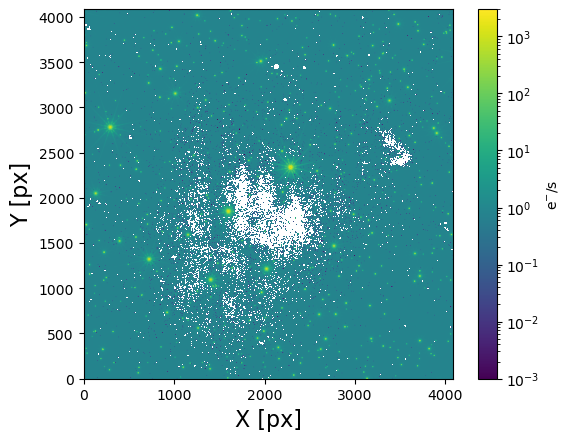

In [29]:
#NOTE: probably choose a different "prettier" image

from matplotlib.colors import LogNorm
plt.imshow(img[:, :].value, origin='lower', norm=LogNorm(1e-3, 3000))
plt.colorbar(label='e$^{-}$/s')
plt.xlabel('X [px]', fontsize=16)
plt.ylabel('Y [px]', fontsize=16)

## File information

Explain pertinent details about the file you've just downloaded. For example, if working with Kepler lightcurves, explain what's in the different file extensions:

```
- No. 0 (Primary): This HDU contains meta-data related to the entire file.
- No. 1 (Light curve): This HDU contains a binary table that holds data like flux measurements and times. We will extract information from here when we define the parameters for the light curve plot.
- No. 2 (Aperture): This HDU contains the image extension with data collected from the aperture. We will also use this to display a bitmask plot that visually represents the optimal aperture used to create the SAP_FLUX column in HDU1.
```

## Sections (xN)

The meat of your notebook should be sub-divided into sections with useful names to whatever extent makes sense base on the content. Break sections up with standard Markdown syntax headings:

```
# Section 1

Intro to section 1

### Sub-section 1a

More detailed info about Section 1

## Section 2

A complete thought that's as important as section 1 but doesn't need sub-sections.
```

## Exercises
Most notebooks are trying to convey _some_ information to their reader. It's often a good idea, if possible, to include in the notebook something where there is not an included answer so that the reader can cement in their mind how whatever it is they were supposed to learn from that notebook. If you do have exercise(s), be sure to leave a blank code cell underneath to show the user that it's meant for them to try it out right there. You may also want to include a "solutions" notebook next to your main notebook for the user to look at after they have finished their attempt.

## Aditional Resources
While this isn't always necessary, sometimes you want to provide some more resources for the reader who wants to learn something beyond what's in the notebook. Sometimes these don't exist, but if they do, it's good to put them at the end to give the reader somewhere else to go. Usually a list of links using markdown bullet-plus-link format is appropriate:

- [MAST API](https://mast.stsci.edu/api/v0/index.html)
- [Kepler Archive Page (MAST)](https://archive.stsci.edu/kepler/)
- [Kepler Archive Manual](https://archive.stsci.edu/kepler/manuals/archive_manual.pdf)
- [Exo.MAST website](https://exo.mast.stsci.edu/exo/ExoMast/html/exomast.html)

## About this notebook
Let the world know who the author of this great notebook is! If possible/appropriate, include a contact email address for users who might need support (e.g. archive@stsci.edu)

**Author:** Jessie Blogs, Archive Scientist.  
**Updated On:** YYYY-MM-DD

***

[Top of Page](#top)
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/> 